In [1]:
# This is a sample script to analyze the results of measuring talker_listener.
# Please build the trace_analysis package before using it.
# The source code used for the measurement can be found here:
# https://github.com/hsgwa/trace_samples

In [2]:
import os
import sys
from pathlib import Path

sys.path.append(os.path.join(os.path.dirname(Path().resolve()), '..'))

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# build and source trace_analysis package
from trace_analysis import Architecture, Application, Lttng

In [5]:
trace_dir_path = './end_to_end_sample/'
lttng = Lttng(trace_dir_path, force_conversion=True)

found converted file but will re-create it: ./end_to_end_sample/converted
converting trace directory: ./end_to_end_sample
converted 4932 events in 268 ms
output written to: ./end_to_end_sample/converted
 [99%] [Ros2Handler]


In [6]:
arch = Architecture()
architecture_path = './end_to_end_sample/architecture_modified.yaml'
arch.import_file(file_path = architecture_path, file_type='yaml', latency_composer=lttng)

In [7]:
app = Application(arch)

In [8]:
node = app.nodes[0]
print('node_name: ' + node.node_name)

callback = node.callbacks[0]
print('callback_type: ' + callback.TYPE_NAME)
print('subscription topic name :' + callback.topic_name)
print('callback_name: ' + callback.callback_name)
print('callback symbol: ' + callback.symbol)
print('callback unique name: ' + callback.unique_name)

node_name: /actuator_dummy_node
callback_type: subscription_callback
subscription topic name :/topic4
callback_name: subscription_callback_0
callback symbol: ActuatorDummy::ActuatorDummy(std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>,std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>)::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
callback unique name: /actuator_dummy_node/subscription_callback_0


In [9]:
start_callback_unique_name = app.callbacks[6].unique_name
end_callback_unique_name = app.callbacks[0].unique_name
print('path search')
print('start_callback: ' + start_callback_unique_name)
print('end_callback: ' + end_callback_unique_name)

path search
start_callback: /sensor_dummy_node/timer_callback_0
end_callback: /actuator_dummy_node/subscription_callback_0


In [10]:
paths = app.search_paths(start_callback_unique_name, end_callback_unique_name)

In [11]:
paths

[[<trace_analysis.callback.TimerCallback object at 0x7fa1e570d6d0>, <trace_analysis.communication.Communication object at 0x7fa1e570d3a0>, <trace_analysis.callback.SubscriptionCallback object at 0x7fa1e570da30>, <trace_analysis.communication.Communication object at 0x7fa1e570d790>, <trace_analysis.callback.SubscriptionCallback object at 0x7fa1e570db80>, <trace_analysis.communication.VariablePassing object at 0x7fa1e570dd30>, <trace_analysis.callback.SubscriptionCallback object at 0x7fa1e570dc10>, <trace_analysis.communication.Communication object at 0x7fa1e570d910>, <trace_analysis.callback.SubscriptionCallback object at 0x7fa1e570d8b0>, <trace_analysis.communication.VariablePassing object at 0x7fa1e570d820>, <trace_analysis.callback.TimerCallback object at 0x7fa1e570d670>, <trace_analysis.communication.Communication object at 0x7fa1e570d400>, <trace_analysis.callback.SubscriptionCallback object at 0x7fa1e57aebe0>]]

In [12]:
path = paths[0]

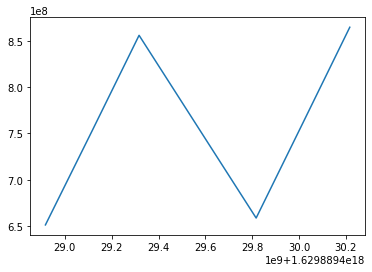

In [13]:
t, latency = path.to_timeseries(remove_dropped=True)
plt.plot(t, latency)

In [14]:
path.to_timeseries()[1]

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

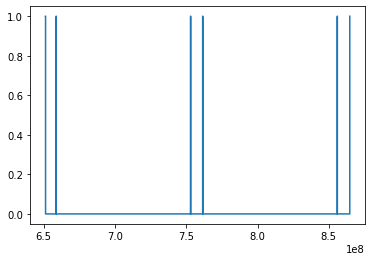

In [15]:
histogram, bins = path.to_histogram(binsize_ns=100000)
plt.step(bins[:-1], histogram, where='post')

In [16]:
df = path.to_dataframe(remove_dropped=True)
df

,/sensor_dummy_node/timer_callback_0/callback_start_timestamp/0,/sensor_dummy_node/timer_callback_0/rclcpp_publish_timestamp/0,/sensor_dummy_node/timer_callback_0/rcl_publish_timestamp/0,/sensor_dummy_node/timer_callback_0/dds_write_timestamp/0,/filter_node/subscription_callback_0/on_data_available_timestamp/0,/sensor_dummy_node/timer_callback_0/callback_end_timestamp/0,/filter_node/subscription_callback_0/callback_start_timestamp/0,/filter_node/subscription_callback_0/rclcpp_publish_timestamp/0,/filter_node/subscription_callback_0/rcl_publish_timestamp/0,/filter_node/subscription_callback_0/dds_write_timestamp/0,...,/timer_driven_node/subscription_callback_0/callback_start_timestamp/0,/timer_driven_node/subscription_callback_0/callback_end_timestamp/0,/timer_driven_node/timer_callback_0/callback_start_timestamp/0,/timer_driven_node/timer_callback_0/rclcpp_publish_timestamp/0,/timer_driven_node/timer_callback_0/rcl_publish_timestamp/0,/timer_driven_node/timer_callback_0/dds_write_timestamp/0,/actuator_dummy_node/subscription_callback_0/on_data_available_timestamp/0,/timer_driven_node/timer_callback_0/callback_end_timestamp/0,/actuator_dummy_node/subscription_callback_0/callback_start_timestamp/0,/actuator_dummy_node/subscription_callback_0/callback_end_timestamp/0
178,1629889430216975114,1629889430216990781,1629889430216994239,1629889430216997729,1629889430217048933,1629889430217059947,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,...,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18
182,1629889430017063190,1629889430017078915,1629889430017082712,1629889430017086102,1629889430017137504,1629889430017148472,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,...,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18
186,1629889429816970469,1629889429816986150,1629889429816990200,1629889429816993616,1629889429817045974,1629889429817057052,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,...,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18
196,1629889429316834628,1629889429316854513,1629889429316858702,1629889429316863571,1629889429316924637,1629889429316938602,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,...,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18
200,1629889429116698459,1629889429116705399,1629889429116706693,1629889429116708459,1629889429116730153,1629889429116733467,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,...,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18
204,1629889428916720912,1629889428916726198,1629889428916727242,1629889428916728197,1629889428916743554,1629889428916765459,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,...,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18,1.629889e+18


In [17]:
import itertools

In [18]:
remove_column_names

NameError: name 'remove_column_names' is not defined

In [19]:
show_column_names_part = ['callback_start', 'callback_end']
show_column_names = []
for column_name, part in  itertools.product(df.columns, show_column_names_part):
    if part in column_name:
        show_column_names.append(column_name)

([<matplotlib.axis.YTick at 0x7fa1e5a36640>,
 <a list of 14 Text yticklabel objects>)

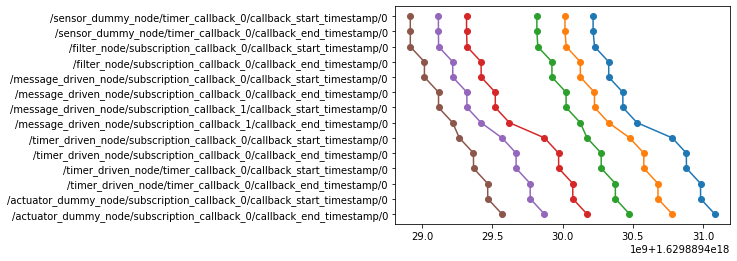

In [20]:
df_filtered = df[show_column_names]
for i, row in df_filtered.iterrows():
    x = row.values
    y = np.array(range(len(x))) * -1
    plt.plot(x, y, marker='o')

plt.yticks(y, df_filtered.columns)